In [45]:
import torch
from torch import nn # torch.nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [46]:
torch.__version__

'2.3.0+cu121'

## 1. Data (Preparing and loading)

In [47]:
# Creating known parameters

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
y = weight*X+bias
X[:10],y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [48]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [49]:
X_train = X[:int(len(X)*0.8)]
x_test = X[int(len(X)*0.8):]
Y_train = y[:int(len(y)*0.8)]
y_test = X[int(len(y)*0.8):]
X_train, x_test, Y_train, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
        

In [50]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

## Build model in PyTorch

In [52]:
# Creating linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))

  # Forward methos to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias

In [53]:
# create a random seed

torch.manual_seed(42)

#create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [54]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using `torch.inference_mode()`

When we pass data through our model, it's going to run it through the `forward()` method

In [55]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

In [56]:
# Make predections with model
with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [57]:
y_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [58]:
 # Setup loss fucntion
 loss_fn = nn.L1Loss()

 # Setup optimizer
 optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.01) # lr=learning rate is the hyper parameter that we can set

In [59]:
loss_fn

L1Loss()

### Building a training model in PyTorch

In [60]:
torch.manual_seed(42)

# An epoch is one through the entire data
epochs = 100

for epoch in range (epochs):
  # Set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, Y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval() # turns off different settings in the model not needed for ebaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things
    #1. The forward pass
    test_pred = model_0(x_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Loss: 0.6860889196395874
Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7967526912689209
Loss: 0.6745679974555969
Epoch: 1 | Loss: 0.6745679974555969 | Test Loss: 0.7832816243171692
Loss: 0.6630470156669617
Epoch: 2 | Loss: 0.6630470156669617 | Test Loss: 0.769810676574707
Loss: 0.6515260338783264
Epoch: 3 | Loss: 0.6515260338783264 | Test Loss: 0.7563396692276001
Loss: 0.6400049924850464
Epoch: 4 | Loss: 0.6400049924850464 | Test Loss: 0.7428686618804932
Loss: 0.6284840703010559
Epoch: 5 | Loss: 0.6284840703010559 | Test Loss: 0.729397714138031
Loss: 0.6169630289077759
Epoch: 6 | Loss: 0.6169630289077759 | Test Loss: 0.7159268260002136
Loss: 0.6054420471191406
Epoch: 7 | Loss: 0.6054420471191406 | Test Loss: 0.7024557590484619
Loss: 0.5939210653305054
Epoch: 8 | Loss: 0.5939210653305054 | Test Loss: 0.688984751701355
Loss: 0.5824000239372253
Epoch: 9 | Loss: 0.5824000239372253 | Test Loss: 0.6755138039588928
Loss: 0.5708791017532349
Epoch: 10 | Loss: 0.5708791017532349 | Test Loss

In [61]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [62]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

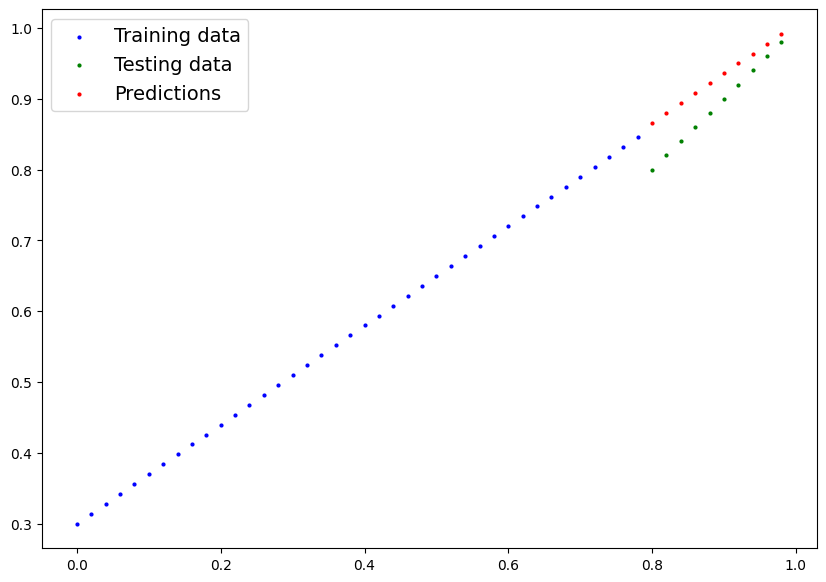

In [63]:
plot_predictions(predictions = y_preds_new)

In [64]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

### Saving a model in PyTorch

Three main things we can do.

1. `torch.save()` - allows you to save a PyTorch object in python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [67]:
#Saving our PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading model


In [68]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [69]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

## Putting it all together

In [71]:
# importing torch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

# checking pytorch version
torch.__version__

'2.3.0+cu121'

## Create device agnostic code

This means if we have access to GPU, our code will use it

In [74]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Data

In [95]:
# create some data using the linear regression formula
weight = 0.6
bias = 0.2

# create X and y
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight*X+bias
X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480],
         [0.2600],
         [0.2720],
         [0.2840],
         [0.2960],
         [0.3080]]),
 50,
 50)

In [96]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

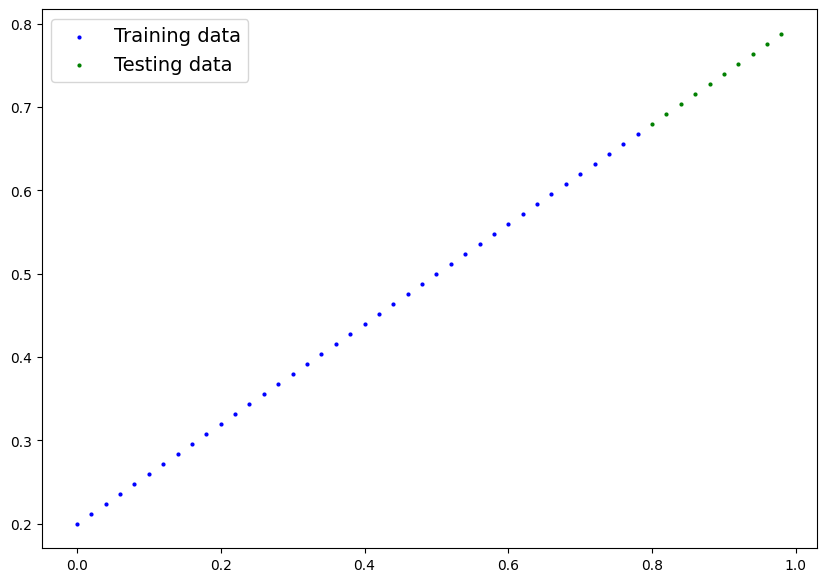

In [97]:
#Plotting the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building a pytorch linear model

In [98]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called: linera transform, probing layer, dense layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)
#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

## Training

In [99]:
#setup loss function
loss_func = nn.L1Loss() # this is same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [100]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagationm
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  #Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.6941779851913452 | Test loss: 0.7629762291908264
Epoch: 10 | Loss: 0.5789680480957031 | Test loss: 0.6282663941383362
Epoch: 20 | Loss: 0.4637581706047058 | Test loss: 0.49355649948120117
Epoch: 30 | Loss: 0.3485483229160309 | Test loss: 0.3588467240333557
Epoch: 40 | Loss: 0.23333843052387238 | Test loss: 0.22413687407970428
Epoch: 50 | Loss: 0.11812856048345566 | Test loss: 0.08942705392837524
Epoch: 60 | Loss: 0.01466408371925354 | Test loss: 0.027661234140396118
Epoch: 70 | Loss: 0.01041039265692234 | Test loss: 0.0235457606613636
Epoch: 80 | Loss: 0.006971584167331457 | Test loss: 0.01527326088398695
Epoch: 90 | Loss: 0.0035398390609771013 | Test loss: 0.007687687873840332
Epoch: 100 | Loss: 0.0036876772064715624 | Test loss: 0.012758761644363403
Epoch: 110 | Loss: 0.0036876772064715624 | Test loss: 0.012758761644363403
Epoch: 120 | Loss: 0.0036876772064715624 | Test loss: 0.012758761644363403
Epoch: 130 | Loss: 0.0036876772064715624 | Test loss: 0.0127587616443

In [101]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5940]])),
             ('linear_layer.bias', tensor([0.2060]))])